### Simple examples
* Based on https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac
* http://calculator.vhex.net/calculator/distance/cosine-distance


### Code

In [21]:
import numpy as np
import tensorflow as tf
corpus_raw = 'He is the king . The king is royal . She is the royal queen '
# convert to lower case
corpus_raw = corpus_raw.lower()

In [22]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i, word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [23]:
print(word2int['queen'])

2


In [24]:
print(int2word[2])

queen


In [25]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [26]:
sentences

[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

In [41]:
data = []
WINDOW_SIZE = 1
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [42]:
data

[['he', 'is'],
 ['is', 'he'],
 ['is', 'the'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'the'],
 ['the', 'king'],
 ['king', 'the'],
 ['king', 'is'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'is'],
 ['she', 'is'],
 ['is', 'she'],
 ['is', 'the'],
 ['the', 'is'],
 ['the', 'royal'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'royal']]

In [43]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [44]:
x_train

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

In [45]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [46]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [47]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [48]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

('loss is : ', 2.9817405)
('loss is : ', 2.7545676)
('loss is : ', 2.5982666)
('loss is : ', 2.4767556)
('loss is : ', 2.3726285)
('loss is : ', 2.279298)
('loss is : ', 2.1942942)
('loss is : ', 2.1165872)
('loss is : ', 2.0456967)
('loss is : ', 1.9813687)
('loss is : ', 1.9234089)
('loss is : ', 1.8715851)
('loss is : ', 1.8255653)
('loss is : ', 1.784893)
('loss is : ', 1.7490034)
('loss is : ', 1.7172699)
('loss is : ', 1.6890609)
('loss is : ', 1.6637914)
('loss is : ', 1.6409546)
('loss is : ', 1.620135)
('loss is : ', 1.601004)
('loss is : ', 1.5833066)
('loss is : ', 1.5668465)
('loss is : ', 1.5514709)
('loss is : ', 1.5370584)
('loss is : ', 1.5235112)
('loss is : ', 1.5107476)
('loss is : ', 1.4986978)
('loss is : ', 1.4873018)
('loss is : ', 1.4765068)
('loss is : ', 1.4662654)
('loss is : ', 1.4565356)
('loss is : ', 1.4472787)
('loss is : ', 1.4384602)
('loss is : ', 1.4300487)
('loss is : ', 1.4220152)
('loss is : ', 1.4143331)
('loss is : ', 1.4069786)
('loss is : ', 1

('loss is : ', 1.0083244)
('loss is : ', 1.0082734)
('loss is : ', 1.0082225)
('loss is : ', 1.0081719)
('loss is : ', 1.0081217)
('loss is : ', 1.0080717)
('loss is : ', 1.008022)
('loss is : ', 1.0079725)
('loss is : ', 1.0079234)
('loss is : ', 1.0078745)
('loss is : ', 1.007826)
('loss is : ', 1.0077776)
('loss is : ', 1.0077295)
('loss is : ', 1.0076817)
('loss is : ', 1.0076343)
('loss is : ', 1.007587)
('loss is : ', 1.00754)
('loss is : ', 1.0074933)
('loss is : ', 1.0074466)
('loss is : ', 1.0074005)
('loss is : ', 1.0073545)
('loss is : ', 1.0073087)
('loss is : ', 1.0072633)
('loss is : ', 1.007218)
('loss is : ', 1.0071731)
('loss is : ', 1.0071284)
('loss is : ', 1.0070838)
('loss is : ', 1.0070395)
('loss is : ', 1.0069954)
('loss is : ', 1.0069517)
('loss is : ', 1.0069082)
('loss is : ', 1.0068648)
('loss is : ', 1.0068216)
('loss is : ', 1.0067787)
('loss is : ', 1.0067362)
('loss is : ', 1.0066937)
('loss is : ', 1.0066515)
('loss is : ', 1.0066096)
('loss is : ', 1.0

('loss is : ', 0.998037)
('loss is : ', 0.99802893)
('loss is : ', 0.99802095)
('loss is : ', 0.9980129)
('loss is : ', 0.99800503)
('loss is : ', 0.9979971)
('loss is : ', 0.9979892)
('loss is : ', 0.99798125)
('loss is : ', 0.99797344)
('loss is : ', 0.99796563)
('loss is : ', 0.9979578)
('loss is : ', 0.99794996)
('loss is : ', 0.99794215)
('loss is : ', 0.9979345)
('loss is : ', 0.9979267)
('loss is : ', 0.99791896)
('loss is : ', 0.9979113)
('loss is : ', 0.99790365)
('loss is : ', 0.997896)
('loss is : ', 0.99788827)
('loss is : ', 0.99788064)
('loss is : ', 0.9978731)
('loss is : ', 0.9978655)
('loss is : ', 0.99785787)
('loss is : ', 0.99785024)
('loss is : ', 0.9978428)
('loss is : ', 0.9978353)
('loss is : ', 0.9978278)
('loss is : ', 0.99782026)
('loss is : ', 0.99781287)
('loss is : ', 0.9978054)
('loss is : ', 0.99779797)
('loss is : ', 0.99779063)
('loss is : ', 0.9977833)
('loss is : ', 0.99777585)
('loss is : ', 0.9977685)
('loss is : ', 0.99776113)
('loss is : ', 0.997

('loss is : ', 0.9955247)
('loss is : ', 0.99552184)
('loss is : ', 0.99551904)
('loss is : ', 0.9955162)
('loss is : ', 0.9955133)
('loss is : ', 0.9955107)
('loss is : ', 0.99550784)
('loss is : ', 0.995505)
('loss is : ', 0.9955023)
('loss is : ', 0.99549943)
('loss is : ', 0.99549663)
('loss is : ', 0.9954939)
('loss is : ', 0.99549115)
('loss is : ', 0.99548835)
('loss is : ', 0.9954855)
('loss is : ', 0.9954828)
('loss is : ', 0.99548006)
('loss is : ', 0.9954773)
('loss is : ', 0.99547464)
('loss is : ', 0.9954718)
('loss is : ', 0.9954691)
('loss is : ', 0.9954664)
('loss is : ', 0.99546355)
('loss is : ', 0.99546087)
('loss is : ', 0.99545825)
('loss is : ', 0.99545544)
('loss is : ', 0.9954527)
('loss is : ', 0.99545)
('loss is : ', 0.99544734)
('loss is : ', 0.99544466)
('loss is : ', 0.9954419)
('loss is : ', 0.9954392)
('loss is : ', 0.99543655)
('loss is : ', 0.9954338)
('loss is : ', 0.9954311)
('loss is : ', 0.99542844)
('loss is : ', 0.9954257)
('loss is : ', 0.9954231

('loss is : ', 0.994565)
('loss is : ', 0.99456346)
('loss is : ', 0.994562)
('loss is : ', 0.9945604)
('loss is : ', 0.994559)
('loss is : ', 0.9945574)
('loss is : ', 0.99455595)
('loss is : ', 0.9945545)
('loss is : ', 0.9945531)
('loss is : ', 0.9945515)
('loss is : ', 0.9945501)
('loss is : ', 0.9945486)
('loss is : ', 0.99454707)
('loss is : ', 0.99454564)
('loss is : ', 0.9945442)
('loss is : ', 0.9945427)
('loss is : ', 0.9945413)
('loss is : ', 0.99453986)
('loss is : ', 0.9945383)
('loss is : ', 0.99453676)
('loss is : ', 0.99453545)
('loss is : ', 0.9945339)
('loss is : ', 0.99453247)
('loss is : ', 0.99453104)
('loss is : ', 0.99452955)
('loss is : ', 0.994528)
('loss is : ', 0.9945267)
('loss is : ', 0.99452513)
('loss is : ', 0.9945238)
('loss is : ', 0.9945223)
('loss is : ', 0.9945208)
('loss is : ', 0.9945194)
('loss is : ', 0.994518)
('loss is : ', 0.9945165)
('loss is : ', 0.99451506)
('loss is : ', 0.9945137)
('loss is : ', 0.9945122)
('loss is : ', 0.99451065)
('lo

('loss is : ', 0.9939739)
('loss is : ', 0.9939731)
('loss is : ', 0.9939722)
('loss is : ', 0.99397135)
('loss is : ', 0.9939705)
('loss is : ', 0.9939696)
('loss is : ', 0.9939688)
('loss is : ', 0.99396783)
('loss is : ', 0.99396706)
('loss is : ', 0.9939661)
('loss is : ', 0.9939653)
('loss is : ', 0.9939644)
('loss is : ', 0.9939634)
('loss is : ', 0.99396265)
('loss is : ', 0.9939617)
('loss is : ', 0.993961)
('loss is : ', 0.9939601)
('loss is : ', 0.99395925)
('loss is : ', 0.9939583)
('loss is : ', 0.9939575)
('loss is : ', 0.99395657)
('loss is : ', 0.9939558)
('loss is : ', 0.99395484)
('loss is : ', 0.99395406)
('loss is : ', 0.9939531)
('loss is : ', 0.9939524)
('loss is : ', 0.9939515)
('loss is : ', 0.99395066)
('loss is : ', 0.9939498)
('loss is : ', 0.99394894)
('loss is : ', 0.9939481)
('loss is : ', 0.9939472)
('loss is : ', 0.99394643)
('loss is : ', 0.9939455)
('loss is : ', 0.99394476)
('loss is : ', 0.9939438)
('loss is : ', 0.99394304)
('loss is : ', 0.9939421)


('loss is : ', 0.99362546)
('loss is : ', 0.993625)
('loss is : ', 0.9936244)
('loss is : ', 0.99362385)
('loss is : ', 0.99362326)
('loss is : ', 0.9936226)
('loss is : ', 0.9936221)
('loss is : ', 0.99362147)
('loss is : ', 0.9936209)
('loss is : ', 0.9936204)
('loss is : ', 0.99361974)
('loss is : ', 0.99361914)
('loss is : ', 0.9936186)
('loss is : ', 0.993618)
('loss is : ', 0.9936174)
('loss is : ', 0.99361694)
('loss is : ', 0.9936163)
('loss is : ', 0.99361575)
('loss is : ', 0.99361515)
('loss is : ', 0.99361455)
('loss is : ', 0.993614)
('loss is : ', 0.9936134)
('loss is : ', 0.9936129)
('loss is : ', 0.9936123)
('loss is : ', 0.9936117)
('loss is : ', 0.99361116)
('loss is : ', 0.99361056)
('loss is : ', 0.99361)
('loss is : ', 0.9936094)
('loss is : ', 0.99360883)
('loss is : ', 0.99360836)
('loss is : ', 0.9936077)
('loss is : ', 0.99360716)
('loss is : ', 0.99360657)
('loss is : ', 0.9936062)
('loss is : ', 0.99360543)
('loss is : ', 0.99360484)
('loss is : ', 0.9936045)

('loss is : ', 0.99341327)
('loss is : ', 0.9934128)
('loss is : ', 0.9934124)
('loss is : ', 0.9934119)
('loss is : ', 0.9934114)
('loss is : ', 0.9934112)
('loss is : ', 0.9934107)
('loss is : ', 0.9934103)
('loss is : ', 0.9934098)
('loss is : ', 0.99340934)
('loss is : ', 0.993409)
('loss is : ', 0.99340856)
('loss is : ', 0.9934082)
('loss is : ', 0.9934076)
('loss is : ', 0.99340725)
('loss is : ', 0.9934068)
('loss is : ', 0.9934064)
('loss is : ', 0.993406)
('loss is : ', 0.9934055)
('loss is : ', 0.99340516)
('loss is : ', 0.9934047)
('loss is : ', 0.99340427)
('loss is : ', 0.9934039)
('loss is : ', 0.99340343)
('loss is : ', 0.9934031)
('loss is : ', 0.9934026)
('loss is : ', 0.9934021)
('loss is : ', 0.9934017)
('loss is : ', 0.9934012)
('loss is : ', 0.99340093)
('loss is : ', 0.99340045)
('loss is : ', 0.9934)
('loss is : ', 0.99339974)
('loss is : ', 0.99339926)
('loss is : ', 0.99339885)
('loss is : ', 0.9933985)
('loss is : ', 0.993398)
('loss is : ', 0.9933976)
('loss

('loss is : ', 0.9932312)
('loss is : ', 0.9932307)
('loss is : ', 0.99323046)
('loss is : ', 0.9932302)
('loss is : ', 0.99322987)
('loss is : ', 0.99322957)
('loss is : ', 0.99322927)
('loss is : ', 0.9932289)
('loss is : ', 0.9932286)
('loss is : ', 0.9932283)
('loss is : ', 0.99322796)
('loss is : ', 0.99322766)
('loss is : ', 0.99322736)
('loss is : ', 0.993227)
('loss is : ', 0.9932267)
('loss is : ', 0.9932264)
('loss is : ', 0.9932262)
('loss is : ', 0.9932259)
('loss is : ', 0.99322546)
('loss is : ', 0.9932251)
('loss is : ', 0.9932249)
('loss is : ', 0.9932245)
('loss is : ', 0.99322426)
('loss is : ', 0.99322397)
('loss is : ', 0.99322355)
('loss is : ', 0.9932233)
('loss is : ', 0.993223)
('loss is : ', 0.9932226)
('loss is : ', 0.9932224)
('loss is : ', 0.99322206)
('loss is : ', 0.9932219)
('loss is : ', 0.99322146)
('loss is : ', 0.9932213)
('loss is : ', 0.9932209)
('loss is : ', 0.9932205)
('loss is : ', 0.99322015)
('loss is : ', 0.99322)
('loss is : ', 0.99321955)
(

('loss is : ', 0.99309224)
('loss is : ', 0.99309194)
('loss is : ', 0.9930917)
('loss is : ', 0.99309146)
('loss is : ', 0.9930914)
('loss is : ', 0.993091)
('loss is : ', 0.9930908)
('loss is : ', 0.9930906)
('loss is : ', 0.99309033)
('loss is : ', 0.99309003)
('loss is : ', 0.99308985)
('loss is : ', 0.9930897)
('loss is : ', 0.9930894)
('loss is : ', 0.9930891)
('loss is : ', 0.9930889)
('loss is : ', 0.9930887)
('loss is : ', 0.99308836)
('loss is : ', 0.9930881)
('loss is : ', 0.99308795)
('loss is : ', 0.99308765)
('loss is : ', 0.9930875)
('loss is : ', 0.9930872)
('loss is : ', 0.99308693)
('loss is : ', 0.9930867)
('loss is : ', 0.9930865)
('loss is : ', 0.9930862)
('loss is : ', 0.99308604)
('loss is : ', 0.99308586)
('loss is : ', 0.9930857)
('loss is : ', 0.99308527)
('loss is : ', 0.9930851)
('loss is : ', 0.9930849)
('loss is : ', 0.9930847)
('loss is : ', 0.9930843)
('loss is : ', 0.99308413)
('loss is : ', 0.99308395)
('loss is : ', 0.99308366)
('loss is : ', 0.993083

('loss is : ', 0.99298066)
('loss is : ', 0.9929805)
('loss is : ', 0.99298036)
('loss is : ', 0.9929802)
('loss is : ', 0.99298)
('loss is : ', 0.9929798)
('loss is : ', 0.99297965)
('loss is : ', 0.9929794)
('loss is : ', 0.9929792)
('loss is : ', 0.99297905)
('loss is : ', 0.9929789)
('loss is : ', 0.99297875)
('loss is : ', 0.99297845)
('loss is : ', 0.9929783)
('loss is : ', 0.9929781)
('loss is : ', 0.9929779)
('loss is : ', 0.99297774)
('loss is : ', 0.9929776)
('loss is : ', 0.99297744)
('loss is : ', 0.9929773)
('loss is : ', 0.99297714)
('loss is : ', 0.99297684)
('loss is : ', 0.99297667)
('loss is : ', 0.99297637)
('loss is : ', 0.9929762)
('loss is : ', 0.99297607)
('loss is : ', 0.9929759)
('loss is : ', 0.9929757)
('loss is : ', 0.9929754)
('loss is : ', 0.9929754)
('loss is : ', 0.99297523)
('loss is : ', 0.99297506)
('loss is : ', 0.9929749)
('loss is : ', 0.99297464)
('loss is : ', 0.99297446)
('loss is : ', 0.9929743)
('loss is : ', 0.9929741)
('loss is : ', 0.992973

('loss is : ', 0.9929005)
('loss is : ', 0.99290025)
('loss is : ', 0.9929001)
('loss is : ', 0.9928999)
('loss is : ', 0.9928997)
('loss is : ', 0.9928997)
('loss is : ', 0.9928994)
('loss is : ', 0.9928993)
('loss is : ', 0.9928991)
('loss is : ', 0.99289894)
('loss is : ', 0.99289894)
('loss is : ', 0.99289876)
('loss is : ', 0.9928986)
('loss is : ', 0.99289846)
('loss is : ', 0.9928983)
('loss is : ', 0.99289817)
('loss is : ', 0.992898)
('loss is : ', 0.99289787)
('loss is : ', 0.9928977)
('loss is : ', 0.9928974)
('loss is : ', 0.9928974)
('loss is : ', 0.9928972)
('loss is : ', 0.99289703)
('loss is : ', 0.9928969)
('loss is : ', 0.99289685)
('loss is : ', 0.9928967)
('loss is : ', 0.9928964)
('loss is : ', 0.99289626)
('loss is : ', 0.9928961)
('loss is : ', 0.9928961)
('loss is : ', 0.9928958)
('loss is : ', 0.9928957)
('loss is : ', 0.9928956)
('loss is : ', 0.9928954)
('loss is : ', 0.99289525)
('loss is : ', 0.9928951)
('loss is : ', 0.99289495)
('loss is : ', 0.9928948)
(

('loss is : ', 0.9928347)
('loss is : ', 0.99283445)
('loss is : ', 0.99283445)
('loss is : ', 0.99283427)
('loss is : ', 0.99283427)
('loss is : ', 0.9928341)
('loss is : ', 0.9928339)
('loss is : ', 0.9928339)
('loss is : ', 0.99283373)
('loss is : ', 0.9928335)
('loss is : ', 0.99283344)
('loss is : ', 0.9928333)
('loss is : ', 0.99283314)
('loss is : ', 0.992833)
('loss is : ', 0.99283296)
('loss is : ', 0.9928328)
('loss is : ', 0.9928328)
('loss is : ', 0.99283254)
('loss is : ', 0.9928325)
('loss is : ', 0.99283236)
('loss is : ', 0.9928323)
('loss is : ', 0.9928322)
('loss is : ', 0.992832)
('loss is : ', 0.9928318)
('loss is : ', 0.9928317)
('loss is : ', 0.9928316)
('loss is : ', 0.9928315)
('loss is : ', 0.99283135)
('loss is : ', 0.9928311)
('loss is : ', 0.99283105)
('loss is : ', 0.9928309)
('loss is : ', 0.9928309)
('loss is : ', 0.99283063)
('loss is : ', 0.99283063)
('loss is : ', 0.99283046)
('loss is : ', 0.9928303)
('loss is : ', 0.99283016)
('loss is : ', 0.9928301

('loss is : ', 0.9927748)
('loss is : ', 0.99277467)
('loss is : ', 0.9927746)
('loss is : ', 0.99277437)
('loss is : ', 0.99277437)
('loss is : ', 0.9927742)
('loss is : ', 0.9927742)
('loss is : ', 0.992774)
('loss is : ', 0.992774)
('loss is : ', 0.99277383)
('loss is : ', 0.99277383)
('loss is : ', 0.99277365)
('loss is : ', 0.99277353)
('loss is : ', 0.9927734)
('loss is : ', 0.9927734)
('loss is : ', 0.99277323)
('loss is : ', 0.99277306)
('loss is : ', 0.99277306)
('loss is : ', 0.9927729)
('loss is : ', 0.9927729)
('loss is : ', 0.9927727)
('loss is : ', 0.99277246)
('loss is : ', 0.99277246)
('loss is : ', 0.9927724)
('loss is : ', 0.9927723)
('loss is : ', 0.9927722)
('loss is : ', 0.9927721)
('loss is : ', 0.9927719)
('loss is : ', 0.9927719)
('loss is : ', 0.99277174)
('loss is : ', 0.99277174)
('loss is : ', 0.9927715)
('loss is : ', 0.9927715)
('loss is : ', 0.9927713)
('loss is : ', 0.99277127)
('loss is : ', 0.99277115)
('loss is : ', 0.99277115)
('loss is : ', 0.992771

('loss is : ', 0.9927303)
('loss is : ', 0.99273026)
('loss is : ', 0.99273014)
('loss is : ', 0.99272996)
('loss is : ', 0.99272996)
('loss is : ', 0.99272984)
('loss is : ', 0.9927298)
('loss is : ', 0.99272954)
('loss is : ', 0.99272954)
('loss is : ', 0.99272937)
('loss is : ', 0.9927295)
('loss is : ', 0.9927293)
('loss is : ', 0.9927293)
('loss is : ', 0.99272907)
('loss is : ', 0.992729)
('loss is : ', 0.992729)
('loss is : ', 0.992729)
('loss is : ', 0.9927288)
('loss is : ', 0.9927287)
('loss is : ', 0.9927286)
('loss is : ', 0.9927284)
('loss is : ', 0.9927284)
('loss is : ', 0.99272835)
('loss is : ', 0.99272835)
('loss is : ', 0.99272823)
('loss is : ', 0.9927281)
('loss is : ', 0.99272805)
('loss is : ', 0.99272805)
('loss is : ', 0.99272776)
('loss is : ', 0.99272764)
('loss is : ', 0.9927276)
('loss is : ', 0.9927276)
('loss is : ', 0.99272746)
('loss is : ', 0.9927274)
('loss is : ', 0.9927273)
('loss is : ', 0.9927273)
('loss is : ', 0.9927271)
('loss is : ', 0.992727)

('loss is : ', 0.9926915)
('loss is : ', 0.9926914)
('loss is : ', 0.99269134)
('loss is : ', 0.9926912)
('loss is : ', 0.9926912)
('loss is : ', 0.99269116)
('loss is : ', 0.99269104)
('loss is : ', 0.99269104)
('loss is : ', 0.99269086)
('loss is : ', 0.99269086)
('loss is : ', 0.99269074)
('loss is : ', 0.9926907)
('loss is : ', 0.99269056)
('loss is : ', 0.99269044)
('loss is : ', 0.9926904)
('loss is : ', 0.99269044)
('loss is : ', 0.99269027)
('loss is : ', 0.99269027)
('loss is : ', 0.9926901)
('loss is : ', 0.9926901)
('loss is : ', 0.9926899)
('loss is : ', 0.9926899)
('loss is : ', 0.9926898)
('loss is : ', 0.9926897)
('loss is : ', 0.9926897)
('loss is : ', 0.9926895)
('loss is : ', 0.9926895)
('loss is : ', 0.9926895)
('loss is : ', 0.9926893)
('loss is : ', 0.9926893)
('loss is : ', 0.99268913)
('loss is : ', 0.99268913)
('loss is : ', 0.99268913)
('loss is : ', 0.992689)
('loss is : ', 0.99268895)
('loss is : ', 0.99268883)
('loss is : ', 0.9926888)
('loss is : ', 0.99268

('loss is : ', 0.99265593)
('loss is : ', 0.99265593)
('loss is : ', 0.9926559)
('loss is : ', 0.99265575)
('loss is : ', 0.99265575)
('loss is : ', 0.9926556)
('loss is : ', 0.9926556)
('loss is : ', 0.99265546)
('loss is : ', 0.99265546)
('loss is : ', 0.9926554)
('loss is : ', 0.9926553)
('loss is : ', 0.9926554)
('loss is : ', 0.99265516)
('loss is : ', 0.99265516)
('loss is : ', 0.992655)
('loss is : ', 0.992655)
('loss is : ', 0.9926548)
('loss is : ', 0.9926548)
('loss is : ', 0.9926548)
('loss is : ', 0.9926548)
('loss is : ', 0.9926546)
('loss is : ', 0.9926546)
('loss is : ', 0.99265444)
('loss is : ', 0.99265444)
('loss is : ', 0.99265444)
('loss is : ', 0.9926543)
('loss is : ', 0.9926542)
('loss is : ', 0.9926542)
('loss is : ', 0.9926542)
('loss is : ', 0.99265414)
('loss is : ', 0.992654)
('loss is : ', 0.99265385)
('loss is : ', 0.99265385)
('loss is : ', 0.99265385)
('loss is : ', 0.99265385)
('loss is : ', 0.99265367)
('loss is : ', 0.99265367)
('loss is : ', 0.992653

('loss is : ', 0.9926237)
('loss is : ', 0.9926237)
('loss is : ', 0.9926235)
('loss is : ', 0.9926235)
('loss is : ', 0.9926235)
('loss is : ', 0.99262345)
('loss is : ', 0.9926233)
('loss is : ', 0.9926233)
('loss is : ', 0.99262315)
('loss is : ', 0.99262315)
('loss is : ', 0.99262315)
('loss is : ', 0.99262303)
('loss is : ', 0.992623)
('loss is : ', 0.992623)
('loss is : ', 0.992623)
('loss is : ', 0.99262285)
('loss is : ', 0.99262273)
('loss is : ', 0.99262273)
('loss is : ', 0.9926227)
('loss is : ', 0.9926227)
('loss is : ', 0.99262255)
('loss is : ', 0.99262255)
('loss is : ', 0.9926224)
('loss is : ', 0.9926224)
('loss is : ', 0.9926224)
('loss is : ', 0.99262226)
('loss is : ', 0.9926222)
('loss is : ', 0.9926222)
('loss is : ', 0.9926221)
('loss is : ', 0.992622)
('loss is : ', 0.992622)
('loss is : ', 0.992622)
('loss is : ', 0.9926218)
('loss is : ', 0.9926218)
('loss is : ', 0.9926218)
('loss is : ', 0.9926217)
('loss is : ', 0.9926216)
('loss is : ', 0.9926216)
('loss 

('loss is : ', 0.9925954)
('loss is : ', 0.9925954)
('loss is : ', 0.9925953)
('loss is : ', 0.9925951)
('loss is : ', 0.9925951)
('loss is : ', 0.9925951)
('loss is : ', 0.9925951)
('loss is : ', 0.9925951)
('loss is : ', 0.992595)
('loss is : ', 0.9925949)
('loss is : ', 0.9925949)
('loss is : ', 0.9925949)
('loss is : ', 0.99259484)
('loss is : ', 0.9925947)
('loss is : ', 0.9925947)
('loss is : ', 0.99259454)
('loss is : ', 0.99259454)
('loss is : ', 0.99259454)
('loss is : ', 0.99259454)
('loss is : ', 0.9925944)
('loss is : ', 0.99259436)
('loss is : ', 0.99259436)
('loss is : ', 0.99259436)
('loss is : ', 0.99259424)
('loss is : ', 0.9925941)
('loss is : ', 0.9925941)
('loss is : ', 0.9925941)
('loss is : ', 0.99259394)
('loss is : ', 0.9925939)
('loss is : ', 0.99259394)
('loss is : ', 0.9925939)
('loss is : ', 0.9925939)
('loss is : ', 0.99259377)
('loss is : ', 0.99259377)
('loss is : ', 0.99259365)
('loss is : ', 0.9925936)
('loss is : ', 0.9925936)
('loss is : ', 0.9925936)

('loss is : ', 0.9925712)
('loss is : ', 0.99257106)
('loss is : ', 0.99257106)
('loss is : ', 0.992571)
('loss is : ', 0.99257106)
('loss is : ', 0.9925709)
('loss is : ', 0.9925709)
('loss is : ', 0.99257076)
('loss is : ', 0.9925707)
('loss is : ', 0.99257076)
('loss is : ', 0.9925707)
('loss is : ', 0.9925707)
('loss is : ', 0.9925706)
('loss is : ', 0.9925705)
('loss is : ', 0.9925705)
('loss is : ', 0.9925705)
('loss is : ', 0.9925704)
('loss is : ', 0.9925703)
('loss is : ', 0.9925704)
('loss is : ', 0.9925703)
('loss is : ', 0.9925703)
('loss is : ', 0.9925701)
('loss is : ', 0.9925701)
('loss is : ', 0.9925701)
('loss is : ', 0.9925701)
('loss is : ', 0.9925699)
('loss is : ', 0.9925699)
('loss is : ', 0.9925699)
('loss is : ', 0.9925698)
('loss is : ', 0.9925698)
('loss is : ', 0.99256974)
('loss is : ', 0.99256974)
('loss is : ', 0.99256974)
('loss is : ', 0.99256974)
('loss is : ', 0.99256957)
('loss is : ', 0.99256957)
('loss is : ', 0.99256945)
('loss is : ', 0.99256957)


('loss is : ', 0.99254924)
('loss is : ', 0.9925491)
('loss is : ', 0.9925491)
('loss is : ', 0.9925491)
('loss is : ', 0.9925491)
('loss is : ', 0.99254906)
('loss is : ', 0.99254894)
('loss is : ', 0.99254894)
('loss is : ', 0.99254894)
('loss is : ', 0.99254894)
('loss is : ', 0.9925488)
('loss is : ', 0.9925488)
('loss is : ', 0.9925488)
('loss is : ', 0.99254876)
('loss is : ', 0.99254876)
('loss is : ', 0.99254864)
('loss is : ', 0.9925486)
('loss is : ', 0.9925486)
('loss is : ', 0.9925486)
('loss is : ', 0.9925486)
('loss is : ', 0.9925486)
('loss is : ', 0.99254835)
('loss is : ', 0.99254835)
('loss is : ', 0.99254835)
('loss is : ', 0.9925483)
('loss is : ', 0.99254817)
('loss is : ', 0.9925483)
('loss is : ', 0.99254817)
('loss is : ', 0.99254817)
('loss is : ', 0.9925481)
('loss is : ', 0.992548)
('loss is : ', 0.992548)
('loss is : ', 0.992548)
('loss is : ', 0.99254787)
('loss is : ', 0.9925478)
('loss is : ', 0.99254787)
('loss is : ', 0.9925478)
('loss is : ', 0.9925478

In [49]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 1.700726    1.3292528   1.6057836  -0.8626881   0.06876674]
 [ 1.0094697   0.4486425  -0.95532006  0.49878448 -2.302582  ]
 [-2.0756047   1.6910703  -1.0597148   1.366205   -0.76567495]
 [-0.32415146  0.6083722  -0.9455063  -2.3163028   2.092312  ]
 [-2.1352856   0.6800722   1.4002765  -0.44077855  0.68177766]
 [-0.9631097   0.10647909  1.5978777   1.8147674  -1.1598861 ]
 [-1.324063   -1.1239004   2.2495103  -0.00935727  1.0324789 ]]
----------
[ 0.613898    0.4370293   2.0254376   0.30775538 -1.4525849 ]
----------


In [50]:
vectors = sess.run(W1 + b1)

In [51]:
print(vectors[ word2int['queen'] ])

[-1.4617066  2.1280997  0.9657228  1.6739603 -2.2182598]


In [52]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [53]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

('king', -0.9977408)
('is', 0.99047595)
('queen', 0.46388704)
('royal', -0.6678039)
('she', 0.25857815)
('the', -0.9936966)
('he', -0.54461014)


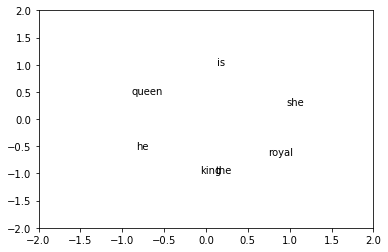

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.show()
